## Thiết lập môi trường làm việc trong Stata
#### Đây là việc đánh dấu tất cả các thư mục làm việc của bạn với một cái tên dễ gợi nhớ
Thống nhất và xuyên suốt cách đặt tên thư mục thích ứng với các máy tính khác nhau

In [1]:
//Tôi lưu tất cả dofile của tôi trong 1 thư mục Dropbox để sử dụng linh động, dễ tìm và tránh thất lạc
global codes "C:\Users\DELL\Dropbox\Mywork\2.Codes"
macro list codes



codes:          C:\Users\DELL\Dropbox\Mywork\2.Codes


#### Tuy nhiên, nếu bạn chia sẻ dropbox folder cho đồng nghiệp hoặc làm chung 1 nhóm hoặc có nhiều hơn 1 máy tính

#### Thông tin máy tính `DELL` sẽ phải thay đổi cho phù hợp

Dưới đây là 1 giải pháp Stata cung cấp để giải quyết vấn đề này

In [2]:
global codes =  "C:\Users\" + "`c(username)'" + "\Dropbox\Mywork\2.Codes"
macro list codes



codes:          C:\Users\Admin\Dropbox\Mywork\2.Codes


### Ví dụ dưới đây mô tả về cách tổ chức thư mục trong 1 dự án

(Tổ chức và xây dựng thư mục cho dự án cần được làm trước khi triển khai các bước làm sạch và phân tích đầu tiên)

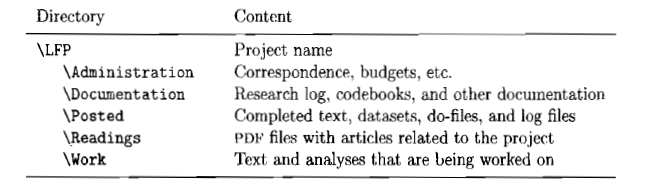 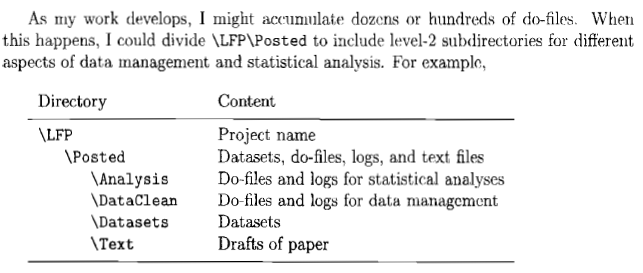

### Tên dự án thường được viết tắt bởi vì khi hoàn toàn sử dụng Stata cho phân tích dữ liệu, tất cả các folder của các dự án cần được set up tại bước này

#### Dưới đây là cách tôi áp dụng trong các dự án thực tế:

In [3]:
//Dự án 1 (prj1)
global prj1_rawdata  "Đường dẫn tới thư mục 1" //Nơi chứa số liệu gốc, không thay đổi từ khi lưu giữ lần đầu tiên
global prj1_postdata "Đường dẫn tới thư mục 2" //Nơi chứa số liệu quá trình từ các dofile
global prj1_result   "Đường dẫn tới thư mục 3" //Nơi chứa kết quả phân tích theo bảng biểu và file báo cáo

//Dự án 2 (prj2)
global prj2_rawdata  "Đường dẫn tới thư mục 1"
global prj2_postdata "Đường dẫn tới thư mục 2"
global prj2_result   "Đường dẫn tới thư mục 3"

//Dự án 3 (prj3)
global prj3_rawdata  "Đường dẫn tới thư mục 1"
global prj3_postdata "Đường dẫn tới thư mục 2"
global prj3_result   "Đường dẫn tới thư mục 3"

* Và còn có thể có nhiều hơn các đường dẫn tùy vào từng dự án nhưng dễ nhớ và dễ tìm

### Cách vận hành sau khi thiết lập môi trường

Giả sử có 10 files số liệu thô tương đồng nhau về cấu trúc trong `prj1_rawdata`: file1-file10 dưới dạng file excel cần làm sạch và xử lý

Cho ra kết quả các bảng thống kê mô tả cơ bản trong thư mục `prj1_result`

Chúng ta sẽ thực hiện như sau: 

In [ ]:
cd "$prj1_rawdata" //chuyển current work direcoty tới nơi chứa raw data
// Load các file số liệu vào stata
forvalues i=1/10 {
    import excel using file`i', first all clear
    save "$prj1_postdata\file`i'.dta", replace //lưu số liệu dưới dạng stata trong prj_postdata
}

// Nối các file số liệu 
cd "$prj1_postdata"
use file1.dta, clear
forvalues i=2/10 {
    append using file`i'
}

* ... hoàn thiện phần làm sạch ...
compress
save "$prj1_postdata\200507_file_clean.dta", replace

// Làm sạch và báo cáo kết quả thống kê cơ bản vào thư mục prj1_result
table1, vars(var1 cat\var2 cat\var3 conts\var4 contn) saving("$prj2_result\200507_ketqua.xlsx", sheet("Ketqua1", replace)) by(var0)

## Tổng hợp những phần cài đặt này lại thành 1 câu lệnh để sử dụng về sau (lưu thành 1 ado file)

In [ ]:
cap drop program mydir
program define mydir
cls
global codes =  "C:\Users\" + "`c(username)'" + "\Dropbox\Mywork\2.Codes"

//Dự án 1 (prj1)
global prj1_rawdata  "Đường dẫn tới thư mục 1" 
global prj1_postdata "Đường dẫn tới thư mục 2" 
global prj1_result   "Đường dẫn tới thư mục 3" 

//Dự án 2 (prj2)
global prj2_rawdata  "Đường dẫn tới thư mục 1"
global prj2_postdata "Đường dẫn tới thư mục 2"
global prj2_result   "Đường dẫn tới thư mục 3"

//Dự án 3 (prj3)
global prj3_rawdata  "Đường dẫn tới thư mục 1"
global prj3_postdata "Đường dẫn tới thư mục 2"
global prj3_result   "Đường dẫn tới thư mục 3"
cls 
end

### Lưu đoạn lệnh trên với tên `mydir.ado` và lưu vào thư mục `C:\ado\plus\m`

Như vậy chúng ta đã có môi trường làm việc với stata có tính tương thích cao.

Và rồi khi có prj mới chỉ cần cập nhật thêm vào trong ado file

Sau đó, khi bắt đầu 1 phiên làm việc mới với stata sẽ thực hiện như sau: 

In [ ]:
mydir
cd "$prj3_postdata"
use "filename", replace

* dosomething